In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

In [14]:
# 1. Load dataset
df = pd.read_csv("ai4i2020.csv")

In [15]:
# 2. Select target + drop unused columns
target = "Machine failure"
X = df.drop(columns=[target, "Product ID", "Type", "UDI"])
y = df[target]


In [16]:
 #3. Train-test split (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [17]:
# 4. Scale before SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
 #5. Apply SMOTE ONLY on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [19]:
# 6. MLP Neural Network (now will learn minority class)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    max_iter=600,
    random_state=42
)

mlp.fit(X_train_res, y_train_res)


MLPClassifier(alpha=0.0005, hidden_layer_sizes=(64, 32), max_iter=600,
              random_state=42)

In [20]:
 #7. Predictions
y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

# 8. Evaluation
print("\n===== CONFUSION MATRIX =====")
print(confusion_matrix(y_test, y_pred))

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_prob))


===== CONFUSION MATRIX =====
[[1932    0]
 [   2   66]]

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000


ROC-AUC: 0.9825006089392279


In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.999


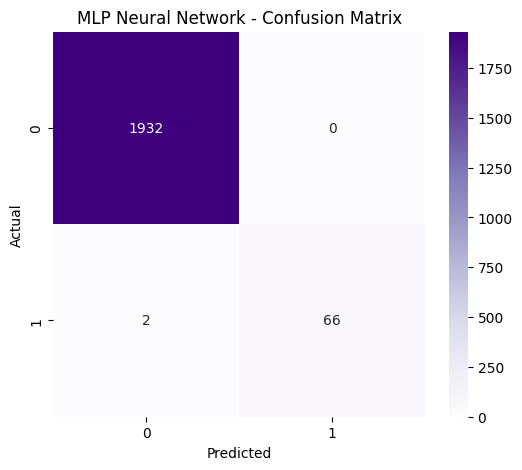

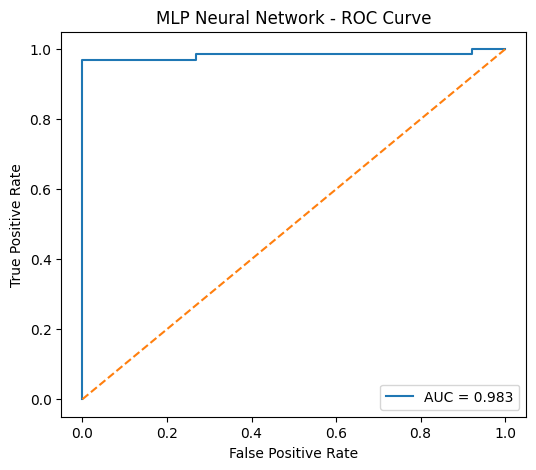

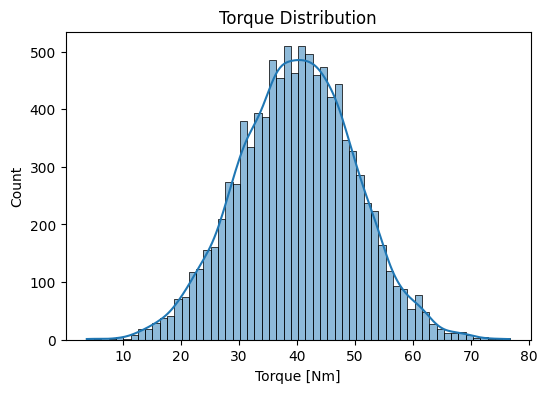

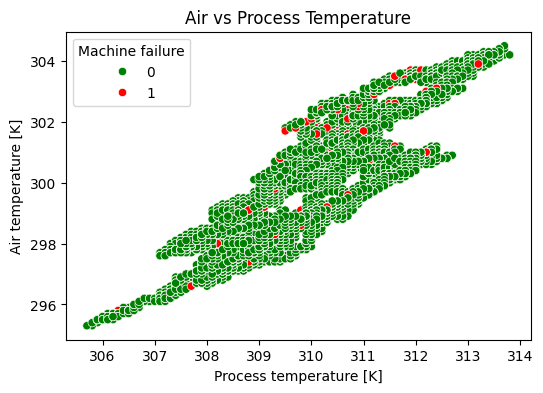

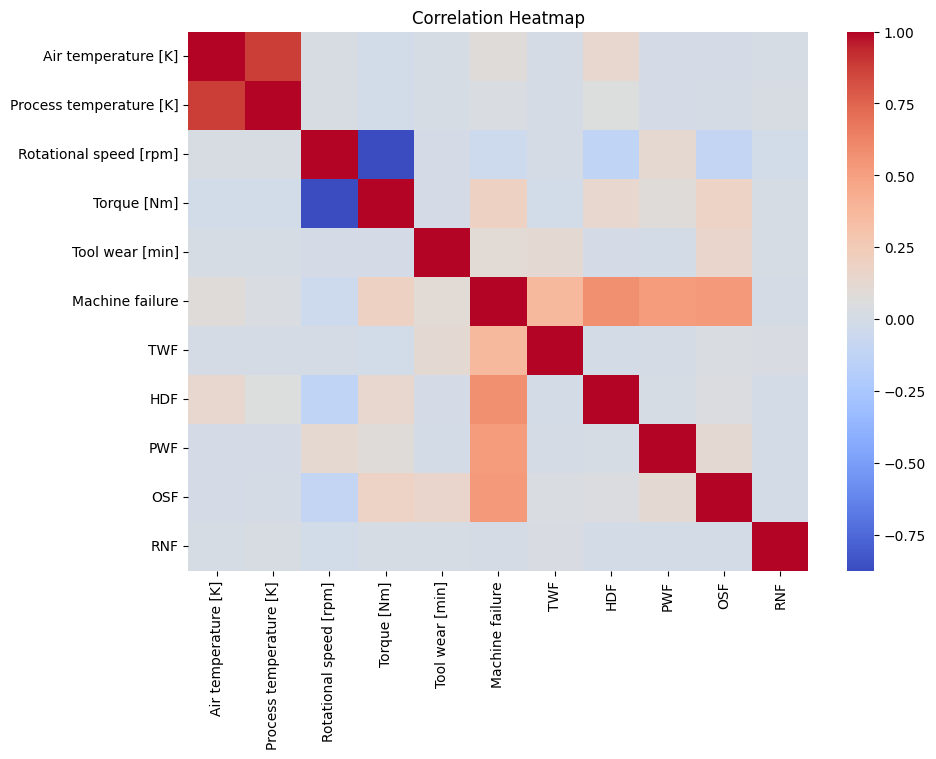

In [23]:
# ==========================================
# VISUALIZATION SECTION FOR MLP MODEL
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("MLP Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP Neural Network - ROC Curve")
plt.legend()
plt.show()

# 3. Torque Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Torque [Nm]"], kde=True)
plt.title("Torque Distribution")
plt.show()

# 4. Temperature Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Process temperature [K]"],
    y=df["Air temperature [K]"],
    hue=df["Machine failure"],
    palette=["green","red"]
)
plt.title("Air vs Process Temperature")
plt.show()

# 5. Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(columns=["Product ID","Type","UDI"]).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
